In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#load data 

data = "data.csv"
df = pd.read_csv(data)
df.head(5)

,Unnamed: 0,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024


In [53]:
#choose data
#df = df.dropna()
#csv2 = csv1[['Acceleration', 'Pressure']].copy()
df_cleaned = df[['Education_Pct', 'Rent', 'Rent_Burden',
                'Overcrowded', 'Owner',
                'Unemployment', 'Median_Income']]
df_cleaned
df_analysis = df_cleaned.dropna()
df_analysis

,Education_Pct,Rent,Rent_Burden,Overcrowded,Unemployment,Median_Income
65,0.76289,2111.18096,0.20772,0.05946,0.04774,115403.24894
66,0.76289,2111.18096,0.20772,0.05946,0.04774,115403.24894
67,0.36332,893.91222,0.23147,0.09846,0.07519,44884.78547
68,0.68138,1689.19446,0.18871,0.04292,0.05488,88443.67008
69,0.68138,1689.19446,0.18871,0.04292,0.05488,88443.67008
...,...,...,...,...,...,...
905,0.38864,1331.00000,0.27331,0.10478,0.04900,61220.00000
906,0.61357,1673.00000,0.21761,0.06550,0.04900,85066.00000
907,0.33456,1482.00000,0.26192,0.13229,0.05200,69320.00000
908,0.34267,1153.00000,0.25996,0.07854,0.04100,82166.00000


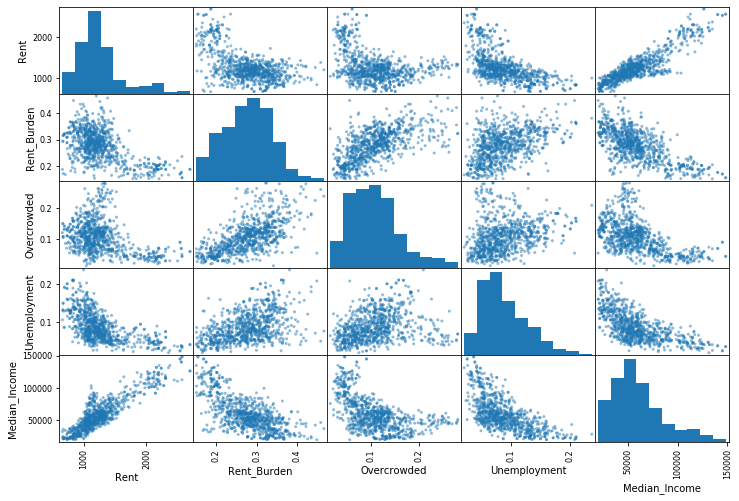

In [55]:
from pandas.plotting import scatter_matrix

attributes = ['Rent', 'Rent_Burden', 'Overcrowded', "Unemployment", "Median_Income"]

scatter_matrix(df_analysis[attributes], figsize=(12,8))

plt.show()

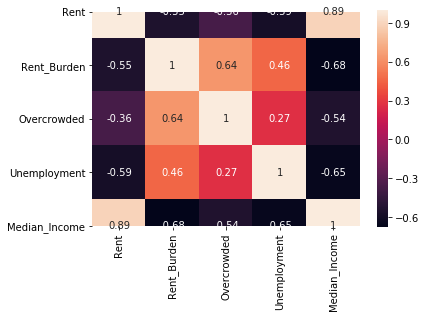

In [56]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_analysis[df_analysis.columns[1:]].corr()
#plt.figure(figsize=(5,10))
sn.heatmap(corrMatrix, square=True, annot=True)
plt.show()

In [57]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_analysis.drop(["Education_Pct"], axis =1)
y = df_analysis["Education_Pct"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


predictions = model.predict(X_test_scaled)
r2_train = model.score(X_train_scaled, y_train_scaled)
r2_test = model.score(X_test_scaled, y_test_scaled)
#MSE = mean_squared_error(y_test_scaled, predictions)

print(f"R2 for Trained: {r2_train}")
print(f"R2 for Test: {r2_test}")


R2 for Trained: 0.8636006184260522
R2 for Test: 0.7817544350301675


In [58]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [59]:
#statsmodel
X = sm.add_constant(X)

model = sm.OLS(y_train_scaled, X_train_scaled).fit()
predictions = model.predict(X_train_scaled)

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              848.4
Date:                Sat, 18 Jul 2020   Prob (F-statistic):                   5.41e-287
Time:                        14:22:44   Log-Likelihood:                         -285.43
No. Observations:                 675   AIC:                                      580.9
Df Residuals:                     670   BIC:                                      603.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\allys\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
